In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, scale
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [68]:
pig_chicken_25_75 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 25-75/pig_chicken_25_75_all.csv', header=None)
pig_chicken_50_50 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 50-50/pig_chicken_50_50_all.csv', header=None)
pig_chicken_75_25 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 75-25/pig_chicken_75_25_all.csv', header=None)

In [70]:
scaler = MinMaxScaler()
for i in range(pig_chicken_25_75.shape[1]):
    pig_chicken_25_75[i] = scaler.fit_transform(pig_chicken_25_75[i].values.reshape(-1, 1))
for i in range(pig_chicken_50_50.shape[1]):
    pig_chicken_50_50[i] = scaler.fit_transform(pig_chicken_50_50[i].values.reshape(-1, 1))
for i in range(pig_chicken_75_25.shape[1]):
    pig_chicken_75_25[i] = scaler.fit_transform(pig_chicken_75_25[i].values.reshape(-1, 1))

In [72]:
X = np.vstack((pig_chicken_25_75, pig_chicken_50_50, pig_chicken_75_25))
y = np.array([0] * pig_chicken_25_75.shape[0] + [1] * pig_chicken_50_50.shape[0] + [2] * pig_chicken_75_25.shape[0])

In [81]:
pca = PCA()
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([9.13553673e-01, 6.73347358e-02, 3.43244616e-03, 2.71010526e-03,
       6.63239961e-04, 5.65271899e-04, 4.42458594e-04, 4.05392392e-04,
       3.88042466e-04, 3.65458733e-04, 3.55785838e-04, 3.49075982e-04,
       3.39593808e-04, 3.36814579e-04, 3.29890225e-04, 3.26476413e-04,
       3.19350886e-04, 3.08500094e-04, 2.99665139e-04, 2.95096357e-04,
       2.90496721e-04, 2.81124025e-04, 2.79329323e-04, 2.77390328e-04,
       2.74149902e-04, 2.71390200e-04, 2.63608403e-04, 2.59583320e-04,
       2.56215368e-04, 2.50388745e-04, 2.49697306e-04, 2.47993579e-04,
       2.45782656e-04, 2.42688204e-04, 2.40666265e-04, 2.37848078e-04,
       2.33911358e-04, 2.28556572e-04, 2.22529813e-04, 2.18571480e-04,
       2.14932697e-04, 2.12819704e-04, 2.09714680e-04, 2.06420256e-04,
       1.99568197e-04, 1.95700035e-04, 1.92820905e-04, 1.90804342e-04,
       1.84224022e-04])

In [83]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

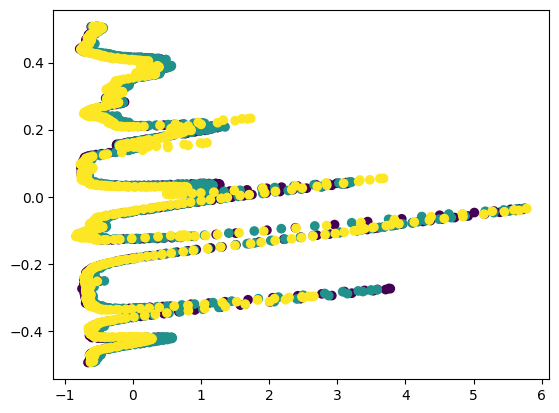

In [85]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.show()

In [88]:
X_reduced.shape

(3036, 3)

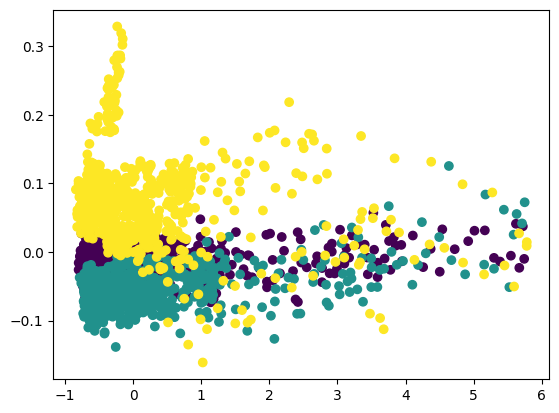

In [86]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], c=y)
plt.show()

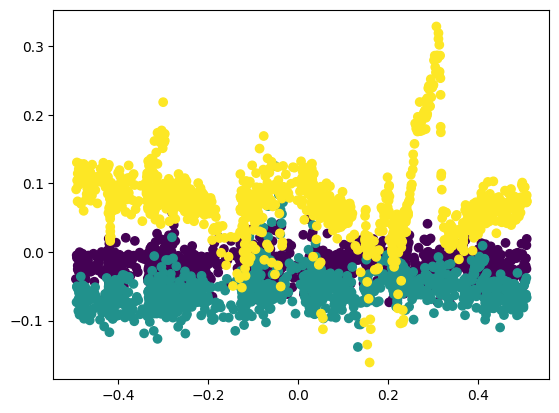

In [87]:
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], c=y)
plt.show()